In [1]:
#pip install opencv-python

import tensorflow as tf

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
x_train=[]
train_path = "Desktop/archive-16/train"
# Iterate over subdirectories in the train_path
for folder in os.listdir(train_path):
    sub_path = os.path.join(train_path, folder)
    # Check if sub_path is a directory
    if os.path.isdir(sub_path):
        # Iterate over files in the subdirectory
        for img in os.listdir(sub_path):
            # Filter out .DS_Store files
            if not img.startswith('.'):
                image_path = os.path.join(sub_path, img)
                img_arr = cv2.imread(image_path)
                # Process the image further as needed


In [3]:
x_test=[]
test_path="Desktop/archive-16/test"
# Iterate over subdirectories in the train_path
for folder in os.listdir(test_path):
    sub_path = os.path.join(test_path, folder)
    # Check if sub_path is a directory
    if os.path.isdir(sub_path):
        # Iterate over files in the subdirectory
        for img in os.listdir(sub_path):
            # Filter out .DS_Store files
            if not img.startswith('.'):
                image_path = os.path.join(sub_path, img)
                img_arr = cv2.imread(image_path)
                # Process the image further as needed


In [4]:
x_val=[]
val_path="Desktop/archive-16/valid"
# Iterate over subdirectories in the train_path
for folder in os.listdir(val_path):
    sub_path = os.path.join(val_path, folder)
    # Check if sub_path is a directory
    if os.path.isdir(sub_path):
        # Iterate over files in the subdirectory
        for img in os.listdir(sub_path):
            # Filter out .DS_Store files
            if not img.startswith('.'):
                image_path = os.path.join(sub_path, img)
                img_arr = cv2.imread(image_path)
                # Process the image further as needed


In [5]:
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)
train_x=train_x/255.0
test_x=test_x/255.0
val_x=val_x/255.0

In [6]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'sparse')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')
val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')


Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Found 265 images belonging to 53 classes.


In [7]:
train_y=training_set.classes
test_y=test_set.classes
val_y=val_set.classes

In [8]:
training_set.class_indices
train_y.shape,test_y.shape,val_y.shape
class_names = list(training_set.class_indices.keys())

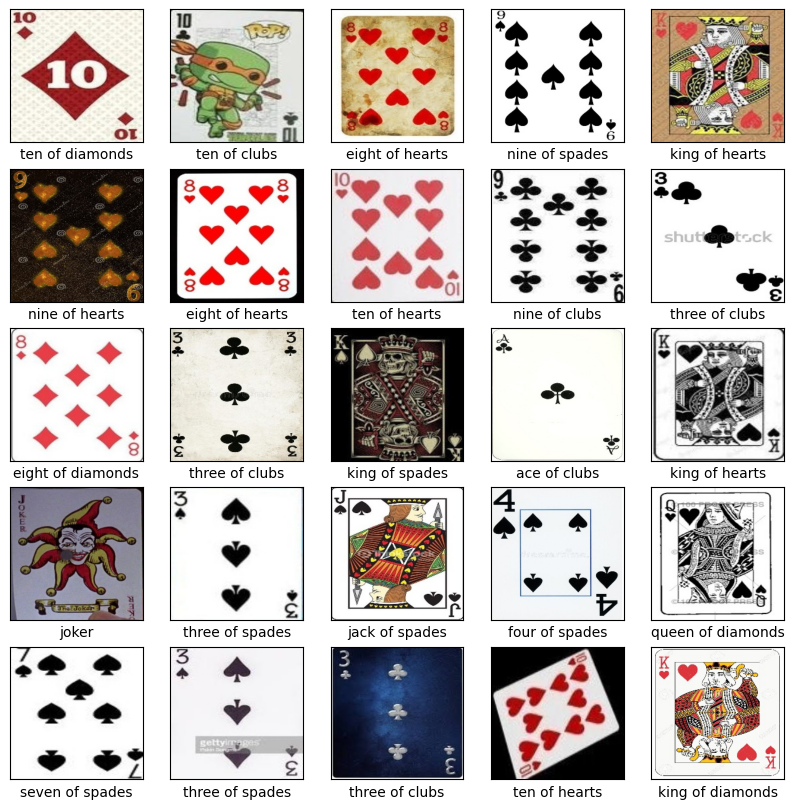

In [9]:
plt.figure(figsize=(10,10))
for i in range(min(25, len(training_set))):
    # Retrieve batch of images and labels from the training set
    images, labels = training_set[i]
    # Plot the first image in the batch
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # Assuming images are in (batch_size, height, width, channels) format
    plt.imshow(images[0])  
    # Assuming labels are single values
    plt.xlabel(class_names[int(labels[0])])   # Display the class label directly
plt.show()

In [10]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(54, activation='softmax'))  # Adjust for the number of classes
model.add(Dropout(0.05))

/Users/jennawilson/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 173056)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    22,151,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 54)             │         6,966 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 54)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,214,582 (84.74 MB)

 Trainable params: 22,214,582 (84.74 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use categorical cross-entropy for classification
              metrics=['accuracy'])

history = model.fit(training_set, epochs=10, validation_data=test_set)

Epoch 1/10


/Users/jennawilson/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


239/239 ━━━━━━━━━━━━━━━━━━━━ 132s 546ms/step - accuracy: 0.1977 - loss: 4.0447 - val_accuracy: 0.6000 - val_loss: 1.5974
Epoch 2/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 149s 624ms/step - accuracy: 0.6174 - loss: 1.9691 - val_accuracy: 0.6830 - val_loss: 1.3752
Epoch 3/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 162s 676ms/step - accuracy: 0.8000 - loss: 1.1787 - val_accuracy: 0.6679 - val_loss: 2.0107
Epoch 4/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 142s 591ms/step - accuracy: 0.8793 - loss: 0.7568 - val_accuracy: 0.6642 - val_loss: 3.4973
Epoch 5/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 136s 568ms/step - accuracy: 0.8972 - loss: 0.6606 - val_accuracy: 0.7019 - val_loss: 3.2544
Epoch 6/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 149s 624ms/step - accuracy: 0.9202 - loss: 0.4981 - val_accuracy: 0.6943 - val_loss: 4.8503
Epoch 7/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 662s 3s/step - accuracy: 0.9153 - loss: 0.5053 - val_accuracy: 0.6717 - val_loss: 4.6670
Epoch 8/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 113s 471ms/step - accuracy: 0.9216 - loss: 0.5033 

In [13]:
# Access validation accuracy from history
val_accuracy = history.history['val_accuracy']

# Print the final validation accuracy
print("Validation Accuracy:", val_accuracy[-1])

Validation Accuracy: 0.7169811129570007


In [14]:
history1 = model.fit(training_set, epochs=5, validation_data=val_set)

Epoch 1/5
239/239 ━━━━━━━━━━━━━━━━━━━━ 112s 466ms/step - accuracy: 0.9288 - loss: 0.3808 - val_accuracy: 0.7019 - val_loss: 6.3526
Epoch 2/5
239/239 ━━━━━━━━━━━━━━━━━━━━ 108s 452ms/step - accuracy: 0.9370 - loss: 0.3919 - val_accuracy: 0.7396 - val_loss: 5.7610
Epoch 3/5
239/239 ━━━━━━━━━━━━━━━━━━━━ 134s 559ms/step - accuracy: 0.9373 - loss: 0.3536 - val_accuracy: 0.7170 - val_loss: 4.8499
Epoch 4/5
239/239 ━━━━━━━━━━━━━━━━━━━━ 127s 531ms/step - accuracy: 0.9297 - loss: 0.4285 - val_accuracy: 0.7283 - val_loss: 5.2044
Epoch 5/5
239/239 ━━━━━━━━━━━━━━━━━━━━ 121s 505ms/step - accuracy: 0.9415 - loss: 0.3584 - val_accuracy: 0.7208 - val_loss: 6.4312


In [15]:
val_accuracy = history1.history['val_accuracy']

# Print the final validation accuracy
print("Validation Accuracy:", val_accuracy[-1])

Validation Accuracy: 0.7207547426223755
